In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import ptitprince as pt
import matplotlib.collections as clt


## SOURCE CONTROLLED ACCURACY AND REACTION TIMES FOR INFERENCE

## Load Data sheets

In [2]:
## INFERENCE!
exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_inference.csv')
exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/srcAB3BC_inference.csv')
exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/srcAB3BC_inference.csv')
exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/srcAB3BC_inference.csv')

exp_1.columns = exp_1.columns.str.replace(" ", "_")
exp_2.columns = exp_2.columns.str.replace(" ", "_")
exp_3.columns = exp_3.columns.str.replace(" ", "_")
exp_4.columns = exp_4.columns.str.replace(" ", "_")

##Reaction Time!!
rt_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_rt.csv')
rt_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/srcAB3BC_rt.csv')
rt_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/srcAB3BC_rt.csv')
rt_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/srcAB3BC_rt.csv')

rt_exp_1.columns = rt_exp_1.columns.str.replace(" ", "_")
rt_exp_2.columns = rt_exp_2.columns.str.replace(" ", "_")
rt_exp_3.columns = rt_exp_3.columns.str.replace(" ", "_")
rt_exp_4.columns = rt_exp_4.columns.str.replace(" ", "_")

In [11]:
stacked_exp1 = pd.melt(exp_1, id_vars=['participant'], value_vars=['Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp2 = pd.melt(exp_2, id_vars=['participant'], value_vars=['Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp3 = pd.melt(exp_3, id_vars=['participant'], value_vars=['Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp4 = pd.melt(exp_4, id_vars=['participant'], value_vars=['Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')

stacked_exp1 ['ExpNum'] = '1'
stacked_exp2 ['ExpNum'] = '2'
stacked_exp3 ['ExpNum'] = '3'
stacked_exp4 ['ExpNum'] = '4'
mrg_experiments= [stacked_exp1, stacked_exp2, stacked_exp3, stacked_exp4]
experiments = pd.concat(mrg_experiments)
experiments

rt_stacked_exp1 = pd.melt(rt_exp_1, id_vars=['participant'], value_vars=['Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
rt_stacked_exp2 = pd.melt(rt_exp_2, id_vars=['participant'], value_vars=['Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
rt_stacked_exp3 = pd.melt(rt_exp_3, id_vars=['participant'], value_vars=['Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
rt_stacked_exp4 = pd.melt(rt_exp_4, id_vars=['participant'], value_vars=['Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')

rt_stacked_exp1 ['ExpNum'] = '1'
rt_stacked_exp2 ['ExpNum'] = '2'
rt_stacked_exp3 ['ExpNum'] = '3'
rt_stacked_exp4 ['ExpNum'] = '4'
rt_mrg_experiments= [rt_stacked_exp1, rt_stacked_exp2, rt_stacked_exp3, rt_stacked_exp4]
rt_experiments = pd.concat(rt_mrg_experiments)
rt_experiments

,participant,condition,RT,ExpNum
0,A0017268R9SKD8U2Y3F,Avg_AC,1.675885,1
1,A12HWPFXQPITHD,Avg_AC,2.353292,1
2,A16G6PPH1INQL8,Avg_AC,1.545959,1
3,A1C5SQZ045W0L5,Avg_AC,2.228687,1
4,A1IFIK8J49WBER,Avg_AC,1.677959,1
...,...,...,...,...
63,A106MX66IVHW6T,Avg_AC_emo,2.345500,4
64,A2V8CV9H3U2M5P,Avg_AC_emo,1.261133,4
65,A4158R4Y06ZB4,Avg_AC_emo,2.136107,4
66,ATOV0H5KQHI29,Avg_AC_emo,1.508067,4


### Line/ Bar Graphs

Text(0, 0.5, 'Inference (AC) accuracy (Source-controlled for AB3 and BC)')

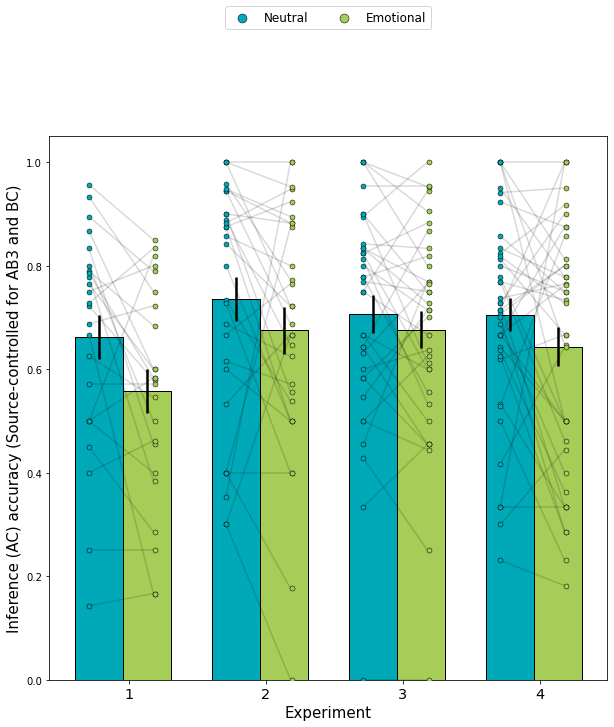

In [12]:
red = '#a6cd57' #emotional
blue = '#00a9b7' #neutral

fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

exp1 = experiments.loc[experiments['ExpNum'] == '1']
exp2 = experiments.loc[experiments['ExpNum'] == '2']
exp3 = experiments.loc[experiments['ExpNum'] == '3']
exp4 = experiments.loc[experiments['ExpNum'] == '4']

exp1_neu = exp1.loc[exp1['condition'] == 'Avg_AC']
exp2_neu = exp2.loc[exp2['condition'] == 'Avg_AC']
exp3_neu = exp3.loc[exp3['condition'] == 'Avg_AC']
exp4_neu = exp4.loc[exp4['condition'] == 'Avg_AC']

exp1_emo = exp1.loc[exp1['condition'] == 'Avg_AC_emo']
exp2_emo = exp2.loc[exp2['condition'] == 'Avg_AC_emo']
exp3_emo = exp3.loc[exp3['condition'] == 'Avg_AC_emo']
exp4_emo = exp4.loc[exp4['condition'] == 'Avg_AC_emo']

neuAC_mean1 = np.mean(exp1_neu['Total_acc'])
emoAC_mean1 = np.mean(exp1_emo['Total_acc'])
neuAC_mean2 = np.mean(exp2_neu['Total_acc'])
emoAC_mean2 = np.mean(exp2_emo['Total_acc'])
neuAC_mean3 = np.mean(exp3_neu['Total_acc'])
emoAC_mean3 = np.mean(exp3_emo['Total_acc'])
neuAC_mean4 = np.mean(exp4_neu['Total_acc'])
emoAC_mean4 = np.mean(exp4_emo['Total_acc'])

neuAC_std1 = stats.sem(exp1_neu['Total_acc'])
emoAC_std1 = stats.sem(exp1_emo['Total_acc'])
neuAC_std2 = stats.sem(exp2_neu['Total_acc'])
emoAC_std2 = stats.sem(exp2_emo['Total_acc'])
neuAC_std3 = stats.sem(exp3_neu['Total_acc'])
emoAC_std3 = stats.sem(exp3_emo['Total_acc'])
neuAC_std4 = stats.sem(exp4_neu['Total_acc'])
emoAC_std4 = stats.sem(exp4_emo['Total_acc'])

neutral_means = [neuAC_mean1, neuAC_mean2, neuAC_mean3, neuAC_mean4]
neutral_sems = [neuAC_std1, neuAC_std2, neuAC_std3, neuAC_std4]
emotional_means = [emoAC_mean1, emoAC_mean2, emoAC_mean3, emoAC_mean4]
emotional_sems = [emoAC_std1, emoAC_std2, emoAC_std3, emoAC_std4]

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(4) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color= blue,
    edgecolor= "black",
    yerr=neutral_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, emotional_means, width,
    color= red,
    edgecolor= "black",
    yerr=emotional_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
##################
#SCATTERPLOT GRAPHS
##################
exps = []
#i = 1.0
i = 0.2
for one_exp, subdf in experiments.groupby('ExpNum'):
    exps.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('condition == "Avg_AC"')['Total_acc'].values
    d = subdf.query('condition == "Avg_AC_emo"')['Total_acc'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
     # Set up line color (based on greater than value)
     #line_colors = (h - d) > 0
     #line_colors = [blue if j else red for j in line_colors]
     #line_colors = [red if j else blue for j in line_colors]
     # Also set up alpha values to make the lines slightly transparent
     #alphas = [0.4]*len(line_colors)
     # Plot the lines connecting the dots
     #for hi, di, ci, ai in zip(h, d, line_colors, alphas):
     # ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.15]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=blue, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=red, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1
    
# Fix the axes and labels
    
ax.set_xticks([0.22, 1.22, 2.22, 3.22])
_ = ax.set_xticklabels(exps, fontsize='x-large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Experiment', fontsize = 15)
ax.set_ylabel('Inference (AC) accuracy (Source-controlled for AB3 and BC)', fontsize =15)

Text(0, 0.5, 'Mean Reaction Time (s) (Src-cntrlld for AB3 and BC)')

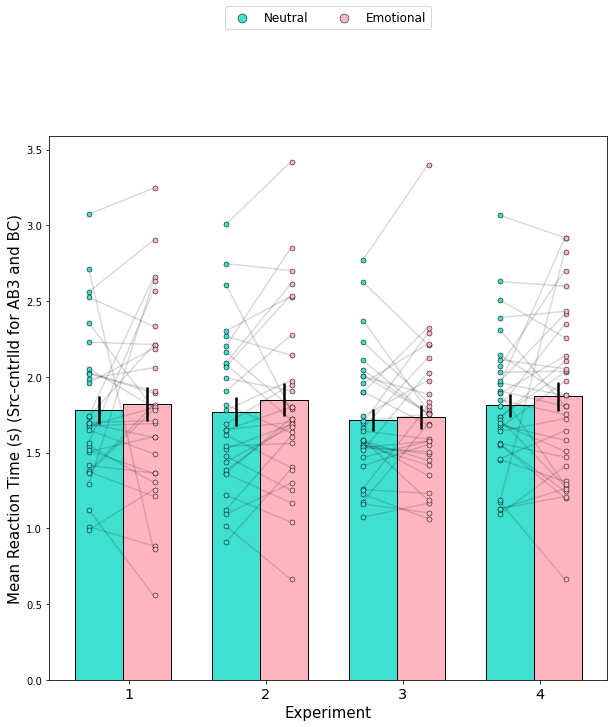

In [8]:
red = '#FFB6C1' #muted green (xkcd)
blue = '#40E0D0' #iris (xkcd)

fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

rt_exp1 = rt_experiments.loc[rt_experiments['ExpNum'] == '1']
rt_exp2 = rt_experiments.loc[rt_experiments['ExpNum'] == '2']
rt_exp3 = rt_experiments.loc[rt_experiments['ExpNum'] == '3']
rt_exp4 = rt_experiments.loc[rt_experiments['ExpNum'] == '4']

rt_exp1_neu = rt_exp1.loc[rt_exp1['condition'] == 'Avg_AC']
rt_exp2_neu = rt_exp2.loc[rt_exp2['condition'] == 'Avg_AC']
rt_exp3_neu = rt_exp3.loc[rt_exp3['condition'] == 'Avg_AC']
rt_exp4_neu = rt_exp4.loc[rt_exp4['condition'] == 'Avg_AC']

rt_exp1_emo = rt_exp1.loc[rt_exp1['condition'] == 'Avg_AC_emo']
rt_exp2_emo = rt_exp2.loc[rt_exp2['condition'] == 'Avg_AC_emo']
rt_exp3_emo = rt_exp3.loc[rt_exp3['condition'] == 'Avg_AC_emo']
rt_exp4_emo = rt_exp4.loc[rt_exp4['condition'] == 'Avg_AC_emo']

rt_neuAC_mean1 = np.mean(rt_exp1_neu['RT'])
rt_emoAC_mean1 = np.mean(rt_exp1_emo['RT'])
rt_neuAC_mean2 = np.mean(rt_exp2_neu['RT'])
rt_emoAC_mean2 = np.mean(rt_exp2_emo['RT'])
rt_neuAC_mean3 = np.mean(rt_exp3_neu['RT'])
rt_emoAC_mean3 = np.mean(rt_exp3_emo['RT'])
rt_neuAC_mean4 = np.mean(rt_exp4_neu['RT'])
rt_emoAC_mean4 = np.mean(rt_exp4_emo['RT'])

rt_neuAC_std1 = stats.sem(rt_exp1_neu['RT'])
rt_emoAC_std1 = stats.sem(rt_exp1_emo['RT'])
rt_neuAC_std2 = stats.sem(rt_exp2_neu['RT'])
rt_emoAC_std2 = stats.sem(rt_exp2_emo['RT'])
rt_neuAC_std3 = stats.sem(rt_exp3_neu['RT'])
rt_emoAC_std3 = stats.sem(rt_exp3_emo['RT'])
rt_neuAC_std4 = stats.sem(rt_exp4_neu['RT'])
rt_emoAC_std4 = stats.sem(rt_exp4_emo['RT'])

neutral_means = [rt_neuAC_mean1, rt_neuAC_mean2, rt_neuAC_mean3, rt_neuAC_mean4]
neutral_sems = [rt_neuAC_std1, rt_neuAC_std2, rt_neuAC_std3, rt_neuAC_std4]
emotional_means = [rt_emoAC_mean1, rt_emoAC_mean2, rt_emoAC_mean3, rt_emoAC_mean4]
emotional_sems = [rt_emoAC_std1, rt_emoAC_std2, rt_emoAC_std3, rt_emoAC_std4]

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(4) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color= blue,
    edgecolor= "black",
    yerr=neutral_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, emotional_means, width,
    color= red,
    edgecolor= "black",
    yerr=emotional_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
##################
#SCATTERPLOT GRAPHS
##################
rt_exps = []
#i = 1.0
i = 0.2
for one_exp, subdf in rt_experiments.groupby('ExpNum'):
    rt_exps.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('condition == "Avg_AC"')['RT'].values
    d = subdf.query('condition == "Avg_AC_emo"')['RT'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
     # Set up line color (based on greater than value)
     #line_colors = (h - d) > 0
     #line_colors = [blue if j else red for j in line_colors]
     #line_colors = [red if j else blue for j in line_colors]
     # Also set up alpha values to make the lines slightly transparent
     #alphas = [0.4]*len(line_colors)
     # Plot the lines connecting the dots
     #for hi, di, ci, ai in zip(h, d, line_colors, alphas):
     # ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.15]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=blue, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=red, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1
    
# Fix the axes and labels
    
ax.set_xticks([0.22, 1.22, 2.22, 3.22])
_ = ax.set_xticklabels(rt_exps, fontsize='x-large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Experiment', fontsize = 15)
ax.set_ylabel('Mean Reaction Time (s) (Src-cntrlld for AB3 and BC)', fontsize =15)

## Barplot Only Opp Valence (Exp 2 and 3)

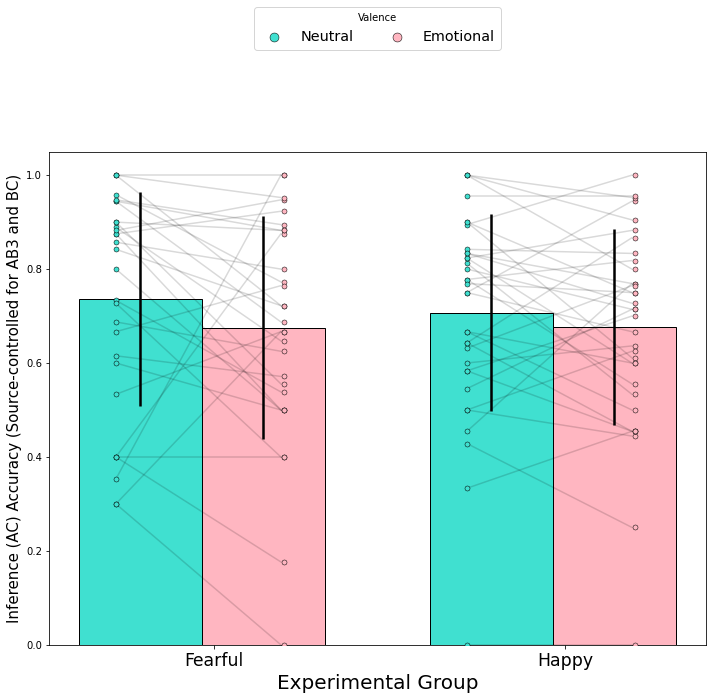

In [9]:
red = '#FFB6C1' #muted green (xkcd)
blue = '#40E0D0' #iris (xkcd)

sam_mrg_experiments= [stacked_exp2, stacked_exp3]
experiments = pd.concat(sam_mrg_experiments)

fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

exp2 = experiments.loc[experiments['ExpNum'] == '2']
exp3 = experiments.loc[experiments['ExpNum'] == '3']


exp2_neu = exp2.loc[exp2['condition'] == 'Avg_AC']
exp3_neu = exp3.loc[exp3['condition'] == 'Avg_AC']

exp2_emo = exp2.loc[exp2['condition'] == 'Avg_AC_emo']
exp3_emo = exp3.loc[exp3['condition'] == 'Avg_AC_emo']


neuAC_mean2 = np.mean(exp2_neu['Total_acc'])
emoAC_mean2 = np.mean(exp2_emo['Total_acc'])
neuAC_mean3 = np.mean(exp3_neu['Total_acc'])
emoAC_mean3 = np.mean(exp3_emo['Total_acc'])



neuAC_std2 = np.std(exp2_neu['Total_acc'])
emoAC_std2 = np.std(exp2_emo['Total_acc'])
neuAC_std3 = np.std(exp3_neu['Total_acc'])
emoAC_std3 = np.std(exp3_emo['Total_acc'])


neutral_means = [neuAC_mean2, neuAC_mean3]
neutral_sems = [neuAC_std2, neuAC_std3]
emotional_means = [emoAC_mean2, emoAC_mean3]
emotional_sems = [emoAC_std2, emoAC_std3]

##################
#BAR GRAPHS
##################
## necessary variables
group_names = ['Fearful', 'Happy']  
x = np.arange(len(group_names))  # the label locations
#ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
ax.bar(x, neutral_means, width,
    color= blue,
    edgecolor= "black",
    yerr=neutral_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(x+width, emotional_means, width,
    color= red,
    edgecolor= "black",
    yerr=emotional_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))



##################
#SCATTERPLOT GRAPHS
##################
exps = []
#i = 1.0
i = 0.2
for one_exp, subdf in experiments.groupby('ExpNum'):
    exps.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('condition == "Avg_AC"')['Total_acc'].values
    d = subdf.query('condition == "Avg_AC_emo"')['Total_acc'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
     # Set up line color (based on greater than value)
     #line_colors = (h - d) > 0
     #line_colors = [blue if j else red for j in line_colors]
     #line_colors = [red if j else blue for j in line_colors]
     # Also set up alpha values to make the lines slightly transparent
     #alphas = [0.4]*len(line_colors)
     # Plot the lines connecting the dots
     #for hi, di, ci, ai in zip(h, d, line_colors, alphas):
     # ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.15]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=blue, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=red, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1
    
# Fix the axes and labels
ax.set_xticks([0.21, 1.21])
_ = ax.set_xticklabels(group_names, fontsize='xx-large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='x-large',
                loc='center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1, title = 'Valence')
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Experimental Group', fontsize = 20)
ax.set_ylabel('Inference (AC) Accuracy (Source-controlled for AB3 and BC)', fontsize =15)
fig.tight_layout()


## Raincloud plot

<ipython-input-13-7ed6623c21bd>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(xticks, fontsize='xx-large')


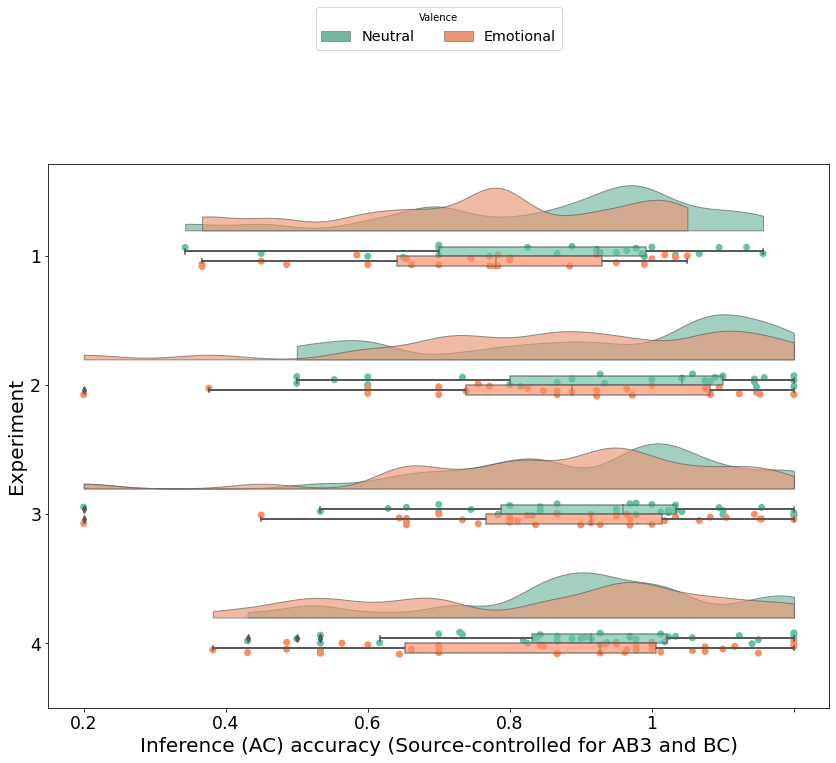

In [13]:
# pal = "Set2"
# # plotting the clouds
# f, ax = plt.subplots(figsize=(7, 5))
# dy="Total_acc"; dx="ExpNum"; ort="v"; #pal = sns.color_palette(n_colors=1)

# # ax=pt.half_violinplot( x = dx, y = dy, data = experiments, palette = pal,
# #       bw = .2, cut = 0.,scale = "area", width = .6, inner = None,
# #       orient = ort)

# #adding the jittered rain"
# # ax=sns.stripplot( x = dx, y = dy, data = experiments, palette = pal, 
# #      edgecolor = "white",size = 3, jitter = 1, zorder = 0,
# #      orient = ort)

# pt.RainCloud(x = dx, y = dy, data = experiments, palette = pal,
#        bw = 0.05, width_viol = .6, ax = ax, orient = ort)

# # Rainclouds with FacetGrid
# g = sns.FacetGrid(experiments, col = "condition", height = 6)
# g = g.map_dataframe(pt.RainCloud, x = "ExpNum", y = "Total_acc",
#        data = experiments, orient = "h")
# g.fig.subplots_adjust(top = 0.75)

# Hue Input for Subgroups

dx="ExpNum"; dy="Total_acc"; dhue="condition"; ort="h"; pal="Set2"; sigma = .2

f, ax = plt.subplots(figsize=(14, 10))
pt.RainCloud(x = dx, y = dy, hue = dhue, data = experiments,
      palette = pal, bw = sigma,width_viol = .7, ax = ax,
      orient = ort, alpha= 0.65, dodge= True, point_size=7)

ax.set_ylabel('Experiment', fontsize = 20)
ax.set_xlabel('Inference (AC) accuracy (Source-controlled for AB3 and BC)', fontsize =20)

xticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1]
yticks = [1,2,3,4]
_ = ax.set_xticklabels(xticks, fontsize='xx-large')
_ = ax.set_yticklabels(yticks, fontsize='xx-large')

Trial_type = ['Neutral', 'Emotional']  
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], Trial_type[0:2],
                fontsize='x-large',
                loc='center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1, title = 'Valence')
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
#adding the boxplot
#ax=sns.boxplot( x = dx, y = dy, data = experiments, color = "black", 
       #width = .15, zorder = 10, showcaps = True,
       #boxprops = {'facecolor':'none', "zorder":10}, showfliers=True,
       #whiskerprops = {'linewidth':2, "zorder":10},
       #saturation = 1, orient = ort)

<ipython-input-14-739ea8d59205>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(xticks, fontsize='xx-large')


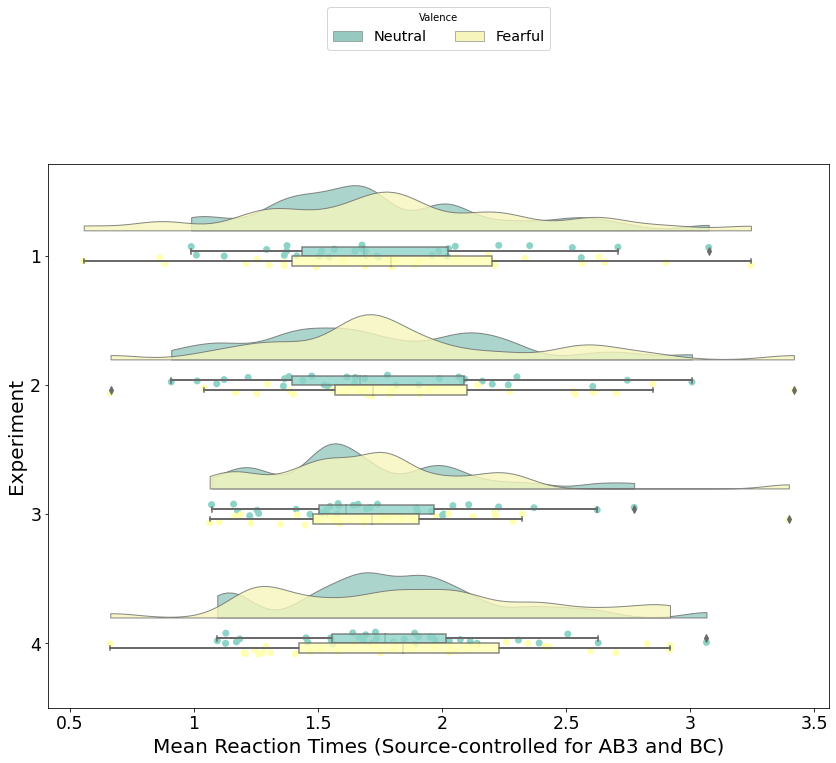

In [14]:
dx="ExpNum"; dy="RT"; dhue="condition"; ort="h"; pal="Set3"; sigma = .2

f, ax = plt.subplots(figsize=(14, 10))
pt.RainCloud(x = dx, y = dy, hue = dhue, data = rt_experiments,
      palette = pal, bw = sigma,width_viol = .7, ax = ax,
      orient = ort, alpha= 0.80, dodge= True, point_size=7)

ax.set_ylabel('Experiment', fontsize = 20)
ax.set_xlabel('Mean Reaction Times (Source-controlled for AB3 and BC)', fontsize =20)

xticks = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
yticks = [1,2,3,4]
_ = ax.set_xticklabels(xticks, fontsize='xx-large')
_ = ax.set_yticklabels(yticks, fontsize='xx-large')

Trial_type = ['Neutral', 'Fearful']
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], Trial_type[0:2],
                fontsize='x-large',
                loc='center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1, title = 'Valence')
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
#adding the boxplot
#ax=sns.boxplot( x = dx, y = dy, data = experiments, color = "black", 
       #width = .15, zorder = 10, showcaps = True,
       #boxprops = {'facecolor':'none', "zorder":10}, showfliers=True,
       #whiskerprops = {'linewidth':2, "zorder":10},
       #saturation = 1, orient = ort)

## VALENCE EFFECTS IN PHASES FOR ALL EXPERIMENTS

In [15]:
exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_inference_valence.csv')
exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/overall_inference_valence.csv')
exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/overall_inference_valence.csv')
exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/overall_inference_valence.csv')

exp_1.columns = exp_1.columns.str.replace(" ", "_")
exp_2.columns = exp_2.columns.str.replace(" ", "_")
exp_3.columns = exp_3.columns.str.replace(" ", "_")
exp_4.columns = exp_4.columns.str.replace(" ", "_")

##Reaction Time!!
rt_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_RT_valence.csv')
rt_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/overall_RT_valence.csv')
rt_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/overall_RT_valence.csv')
rt_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/overall_RT_valence.csv')

rt_exp_1.columns = rt_exp_1.columns.str.replace(" ", "_")
rt_exp_2.columns = rt_exp_2.columns.str.replace(" ", "_")
rt_exp_3.columns = rt_exp_3.columns.str.replace(" ", "_")
rt_exp_4.columns = rt_exp_4.columns.str.replace(" ", "_")

In [16]:
exp_4

,participant,Avg_AB1,Avg_AB2,Avg_AB3,Avg_BC,Avg_XY,Avg_AC,Avg_AB1_emo,Avg_AB2_emo,Avg_AB3_emo,Avg_BC_emo,Avg_XY_emo,Avg_AC_emo
0,A13B52O6OQBPO,0.583333,0.826087,1.000000,0.750000,0.708333,0.791667,0.541667,0.833333,0.875000,0.583333,0.583333,0.625000
1,A18E16UFE351U6,0.652174,0.869565,0.958333,0.833333,0.833333,0.708333,0.500000,0.791667,1.000000,0.708333,0.500000,0.750000
2,A19L8SNH73AX1Z,0.625000,0.875000,0.958333,0.416667,0.333333,0.416667,0.458333,0.625000,0.791667,0.375000,0.291667,0.333333
3,A1DCG37N0Y8BN0,0.916667,0.916667,1.000000,0.916667,0.875000,0.958333,0.625000,0.666667,0.791667,0.833333,0.708333,0.666667
4,A1FYFBIFYWTMJS,0.312500,0.458333,0.875000,0.583333,0.625000,0.250000,0.400000,0.500000,0.666667,0.583333,0.478261,0.291667
5,A1JJYY622DGE5L,0.958333,1.000000,1.000000,0.791667,0.958333,0.958333,0.863636,0.916667,1.000000,0.750000,0.708333,0.958333
6,A1MF5X99676P61A1MF5X99676P61,0.818182,0.916667,1.000000,0.727273,0.619048,0.625000,0.636364,0.916667,1.000000,0.625000,0.428571,0.333333
7,A1P6OXEJ86HQRM,0.625000,0.958333,1.000000,0.625000,0.458333,0.500000,0.708333,0.833333,0.958333,0.625000,0.750000,0.416667
8,A1PTH9KTRO06EG,0.500000,0.791667,0.869565,0.875000,0.416667,0.750000,0.500000,0.541667,0.666667,0.666667,0.416667,0.458333
9,A1TPGXT718D68E,0.590909,0.875000,0.875000,0.695652,0.521739,0.583333,0.347826,0.625000,0.869565,0.583333,0.428571,0.666667


In [17]:
stacked_exp1 = pd.melt(exp_1, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_AC', 'Avg_AC_emo', 'Avg_ABfinal', 'Avg_ABfinal_emo', 'Avg_BCfinal', 'Avg_BCfinal_emo'], var_name='condition', value_name='Total_acc')
stacked_exp2 = pd.melt(exp_2, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp3 = pd.melt(exp_3, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp4 = pd.melt(exp_4, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')

stacked_exp1 ['ExpNum'] = '1'
stacked_exp2 ['ExpNum'] = '2'
stacked_exp3 ['ExpNum'] = '3'
stacked_exp4 ['ExpNum'] = '4'

mrg_experiments= [stacked_exp1, stacked_exp2, stacked_exp3, stacked_exp4]
experiments = pd.concat(mrg_experiments)
experiments

rt_stacked_exp1 = pd.melt(rt_exp_1, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_AC', 'Avg_AC_emo', 'Avg_ABfinal', 'Avg_ABfinal_emo', 'Avg_BCfinal', 'Avg_BCfinal_emo'], var_name='condition', value_name='RT')
rt_stacked_exp2 = pd.melt(rt_exp_2, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
rt_stacked_exp3 = pd.melt(rt_exp_3, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
rt_stacked_exp4 = pd.melt(rt_exp_4, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')

rt_stacked_exp1 ['ExpNum'] = '1'
rt_stacked_exp2 ['ExpNum'] = '2'
rt_stacked_exp3 ['ExpNum'] = '3'
rt_stacked_exp4 ['ExpNum'] = '4'
rt_mrg_experiments= [rt_stacked_exp1, rt_stacked_exp2, rt_stacked_exp3, rt_stacked_exp4]
rt_experiments = pd.concat(rt_mrg_experiments)
rt_experiments

,participant,condition,RT,ExpNum
0,A0017268R9SKD8U2Y3F,Avg_AB3,0.638793,1
1,A12HWPFXQPITHD,Avg_AB3,1.073051,1
2,A16G6PPH1INQL8,Avg_AB3,1.018429,1
3,A1C5SQZ045W0L5,Avg_AB3,1.035213,1
4,A1IFIK8J49WBER,Avg_AB3,0.946272,1
...,...,...,...,...
267,A106MX66IVHW6T,Avg_AC_emo,2.601909,4
268,A2V8CV9H3U2M5P,Avg_AC_emo,1.245136,4
269,A4158R4Y06ZB4,Avg_AC_emo,2.191235,4
270,ATOV0H5KQHI29,Avg_AC_emo,1.774054,4


C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


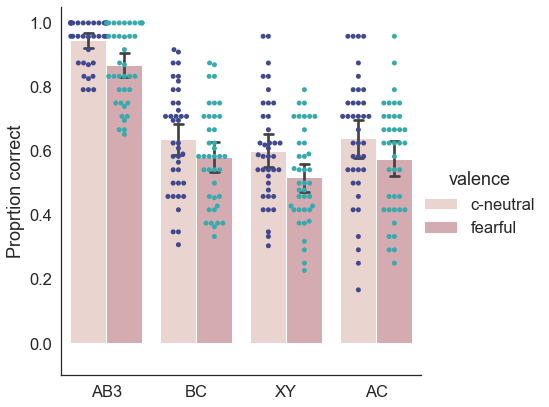

In [18]:
red = '#FFB6C1' #muted green (xkcd)
blue = '#40E0D0' #iris (xkcd)

#fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

experiments.loc[experiments['condition'] == 'Avg_AB3', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_BC', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_XY', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_AC', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_ABfinal', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_BCfinal', 'valence'] = 'c-neutral'

experiments.loc[experiments['condition'] == 'Avg_AB3_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_BC_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_XY_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_AC_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_ABfinal_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_BCfinal_emo', 'valence'] = 'fearful'


experiments.loc[experiments['condition'] == 'Avg_AB3', 'Test'] = 'AB3'
experiments.loc[experiments['condition'] == 'Avg_BC', 'Test'] = 'BC'
experiments.loc[experiments['condition'] == 'Avg_XY', 'Test'] = 'XY'
experiments.loc[experiments['condition'] == 'Avg_AC', 'Test'] = 'AC'
experiments.loc[experiments['condition'] == 'Avg_ABfinal', 'Test'] = 'ABfinal'
experiments.loc[experiments['condition'] == 'Avg_BCfinal', 'Test'] = 'BCfinal'

experiments.loc[experiments['condition'] == 'Avg_AB3_emo', 'Test'] = 'AB3'
experiments.loc[experiments['condition'] == 'Avg_BC_emo', 'Test'] = 'BC'
experiments.loc[experiments['condition'] == 'Avg_XY_emo', 'Test'] = 'XY'
experiments.loc[experiments['condition'] == 'Avg_AC_emo', 'Test'] = 'AC'
experiments.loc[experiments['condition'] == 'Avg_ABfinal_emo', 'Test'] = 'ABfinal'
experiments.loc[experiments['condition'] == 'Avg_BCfinal_emo', 'Test'] = 'BCfinal'

exp1 = experiments.loc[experiments['ExpNum'] == '1']
exp2 = experiments.loc[experiments['ExpNum'] == '2']
exp3 = experiments.loc[experiments['ExpNum'] == '3']
exp4 = experiments.loc[experiments['ExpNum'] == '4']

AB3 = experiments.loc[experiments['Test'] == 'AB3']
BC = experiments.loc[experiments['Test'] == 'BC']
XY = experiments.loc[experiments['Test'] == 'XY']
AC = experiments.loc[experiments['Test'] == 'AC']

# neuAC_mean1 = np.mean(exp1_neu['Total_acc'])
# emoAC_mean1 = np.mean(exp1_emo['Total_acc'])
# neuAC_mean2 = np.mean(exp2_neu['Total_acc'])
# emoAC_mean2 = np.mean(exp2_emo['Total_acc'])
# neuAC_mean3 = np.mean(exp3_neu['Total_acc'])
# emoAC_mean3 = np.mean(exp3_emo['Total_acc'])
# neuAC_mean4 = np.mean(exp4_neu['Total_acc'])
# emoAC_mean4 = np.mean(exp4_emo['Total_acc'])

# neuAC_std1 = np.std(exp1_neu['Total_acc'])
# emoAC_std1 = np.std(exp1_emo['Total_acc'])
# neuAC_std2 = np.std(exp2_neu['Total_acc'])
# emoAC_std2 = np.std(exp2_emo['Total_acc'])
# neuAC_std3 = np.std(exp3_neu['Total_acc'])
# emoAC_std3 = np.std(exp3_emo['Total_acc'])
# neuAC_std4 = np.std(exp4_neu['Total_acc'])
# emoAC_std4 = np.std(exp4_emo['Total_acc'])

# neutral_means = [neuAC_mean1, neuAC_mean2, neuAC_mean3, neuAC_mean4]
# neutral_sems = [neuAC_std1, neuAC_std2, neuAC_std3, neuAC_std4]
# emotional_means = [emoAC_mean1, emoAC_mean2, emoAC_mean3, emoAC_mean4]
# emotional_sems = [emoAC_std1, emoAC_std2, emoAC_std3, emoAC_std4]

##################
#BAR GRAPHS
##################
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="Test", y="Total_acc", hue="valence", data=exp4,
 height=6, kind="bar", palette=sns.cubehelix_palette(), capsize=.1)
g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=exp4, palette = "mako", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('')
plt.show()

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points 

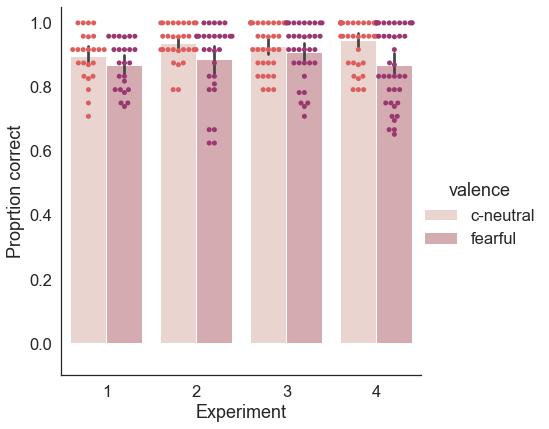

In [19]:
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="ExpNum", y="Total_acc", hue="valence", data=AB3,
 height=6, kind="bar", palette=sns.cubehelix_palette())
g = sns.swarmplot(x="ExpNum", y="Total_acc", hue="valence", data=AB3, palette = "flare", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('Experiment')
#plt.title('AB3 Performance')
plt.show()

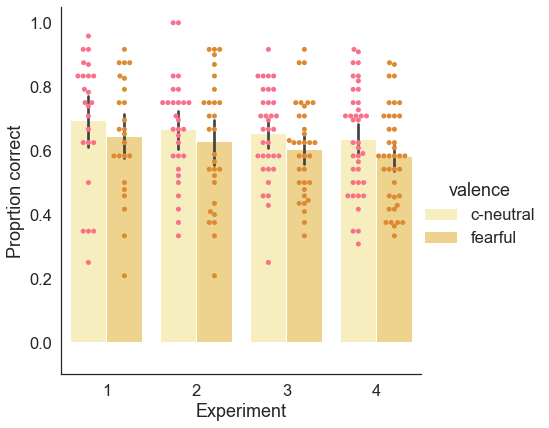

In [20]:
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="ExpNum", y="Total_acc", hue="valence", data=BC,
 height=6, kind="bar", palette=sns.color_palette("YlOrBr"))
g = sns.swarmplot(x="ExpNum", y="Total_acc", hue="valence", data=BC, palette = sns.color_palette("husl", 10) , dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('Experiment')
#plt.title('BC Performance')
plt.show()

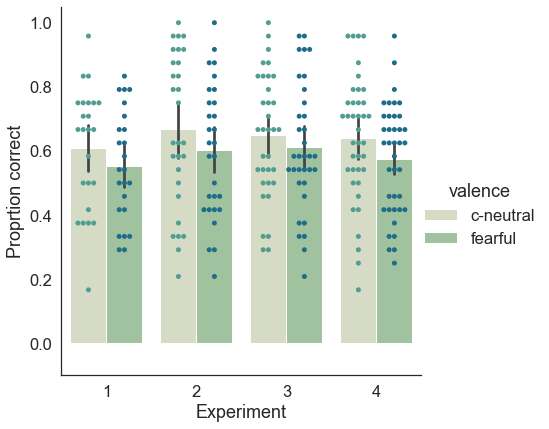

In [21]:
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="ExpNum", y="Total_acc", hue="valence", data=AC,
 height=6, kind="bar", palette=sns.cubehelix_palette(start=.5, rot=-.75))
g = sns.swarmplot(x="ExpNum", y="Total_acc", hue="valence", data=AC, palette = "crest", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('Experiment')
#plt.title('AC Performance')
plt.show()

## BCXY comparison for sequence

(-0.1, 1.05)

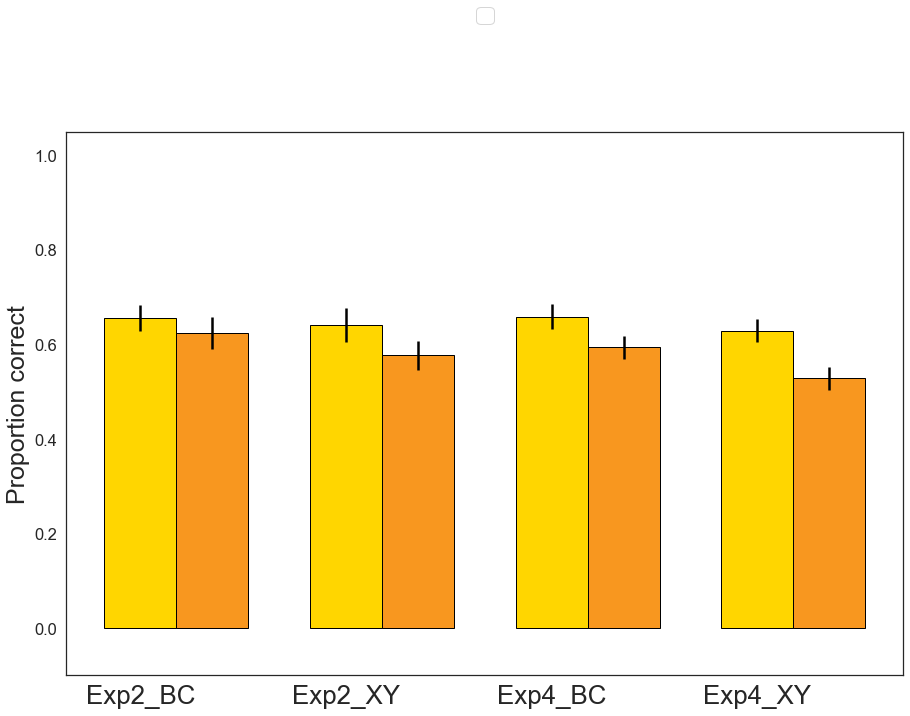

In [66]:
red = '#f8971f' #UT brand orange
blue = '#ffd600' #UT brand yellow (xkcd)

####FOR BAR GRAPHS####

exp2_BC = exp2.loc[exp2['Test'] == 'BC']
exp2_XY = exp2.loc[exp2['Test'] == 'XY']
exp4_BC = exp4.loc[exp4['Test'] == 'BC']
exp4_XY = exp4.loc[exp4['Test'] == 'XY']

neu_exp2_BC = exp2_BC.loc[exp2_BC['condition'] == 'Avg_BC']
neu_exp2_XY = exp2_XY.loc[exp2_XY['condition'] == 'Avg_XY']
neu_exp4_BC = exp4_BC.loc[exp4_BC['condition'] == 'Avg_BC']
neu_exp4_XY = exp4_XY.loc[exp4_XY['condition'] == 'Avg_XY']

emo_exp2_BC = exp2_BC.loc[exp2_BC['condition'] == 'Avg_BC_emo']
emo_exp2_XY = exp2_XY.loc[exp2_XY['condition'] == 'Avg_XY_emo']
emo_exp4_BC = exp4_BC.loc[exp4_BC['condition'] == 'Avg_BC_emo']
emo_exp4_XY = exp4_XY.loc[exp4_XY['condition'] == 'Avg_XY_emo']

neuBC_mean2 = np.mean(neu_exp2_BC['Total_acc'])
emoBC_mean2 = np.mean(emo_exp2_BC['Total_acc'])
neuXY_mean2 = np.mean(neu_exp2_XY['Total_acc'])
emoXY_mean2 = np.mean(emo_exp2_XY['Total_acc'])

neuBC_mean4 = np.mean(neu_exp4_BC['Total_acc'])
emoBC_mean4 = np.mean(emo_exp4_BC['Total_acc'])
neuXY_mean4 = np.mean(neu_exp4_XY['Total_acc'])
emoXY_mean4 = np.mean(emo_exp4_XY['Total_acc'])

neuBC_std2 = stats.sem(neu_exp2_BC['Total_acc'])
emoBC_std2 = stats.sem(emo_exp2_BC['Total_acc'])
neuXY_std2 = stats.sem(neu_exp2_XY['Total_acc'])
emoXY_std2 = stats.sem(emo_exp2_XY['Total_acc'])

neuBC_std4 = stats.sem(neu_exp4_BC['Total_acc'])
emoBC_std4 = stats.sem(emo_exp4_BC['Total_acc'])
neuXY_std4 = stats.sem(neu_exp4_XY['Total_acc'])
emoXY_std4 = stats.sem(emo_exp4_XY['Total_acc'])

neutral_means = [neuBC_mean2, neuXY_mean2, neuBC_mean4, neuXY_mean4]
emotional_means = [emoBC_mean2, emoXY_mean2, emoBC_mean4, emoXY_mean4]

neutral_sems = [neuBC_std2, neuXY_std2, neuBC_std4, neuXY_std4]
emotional_sems = [emoBC_std2, emoXY_std2, emoXY_std4, emoXY_std4]

fig, ax = plt.subplots(figsize=(15, 10))
exps = ['Exp2_BC', 'Exp2_XY', 'Exp4_BC', 'Exp4_XY' ]
##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(4)  # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
rects1 = ax.bar(ind, neutral_means, width,
    color= blue,
    edgecolor= "black",
    yerr=neutral_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
rects2 = ax.bar(ind+width, emotional_means, width,
    color= red,
    edgecolor= "black",
    yerr=emotional_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))


ax.set_xticks([0,1,2,3])
_ = ax.set_xticklabels(exps, fontsize='x-large')
#Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:4], labels[0:4],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
#lgd.legendHandles[0]._sizes = [80]
#lgd.legendHandles[1]._sizes = [80]
#ax.set_xlabel('Experiment', fontsize = 15)
ax.set_ylabel('Proportion correct', fontsize =25)
plt.ylim(-0.1, 1.05)


In [55]:
rects4

<BarContainer object of 2 artists>